## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

### Objective:

##### Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Part 1: Data Preparation and Exploration

##### 1) Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [331]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.set_index('date').sort_index()

In [332]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [334]:
df.shape

(7588, 1)

In [335]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


##### 2) Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

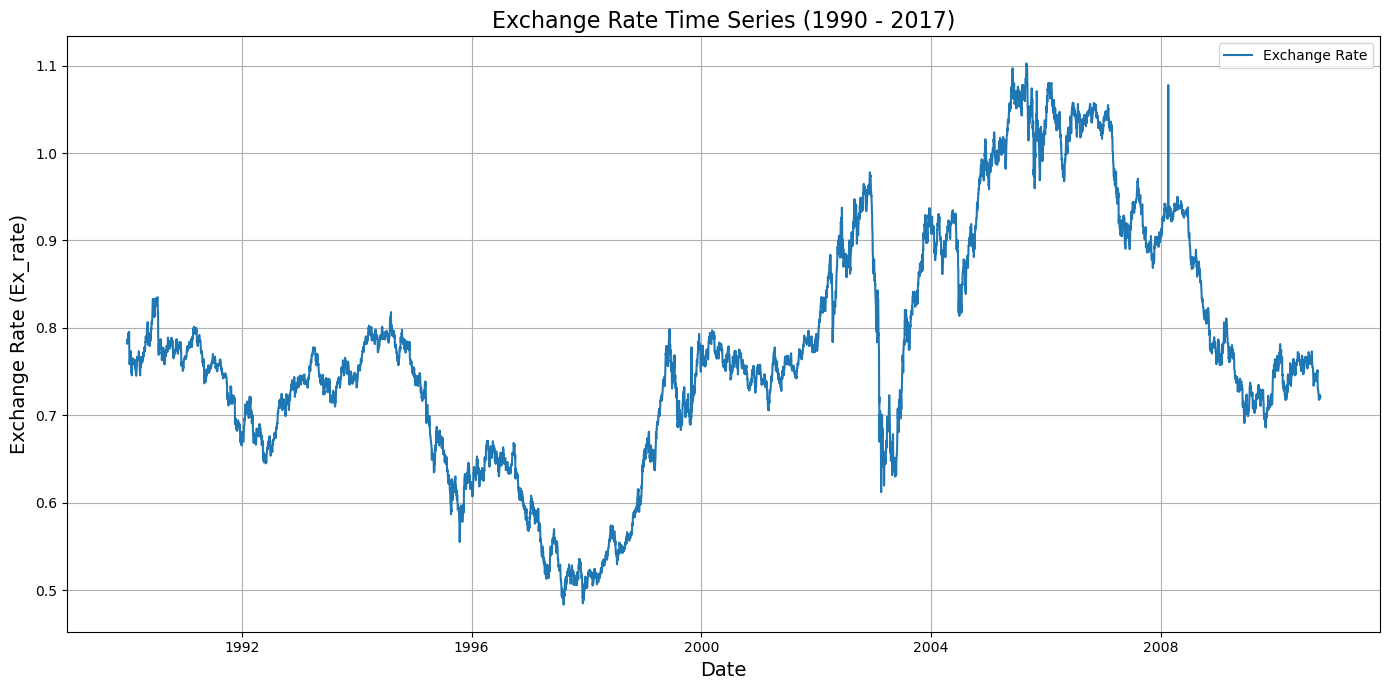

In [336]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Time Series (1990 - 2017)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Exchange Rate (Ex_rate)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

##### 3) Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [337]:
### Checking missing values
df.isnull().sum()

Ex_rate    0
dtype: int64

<Axes: >

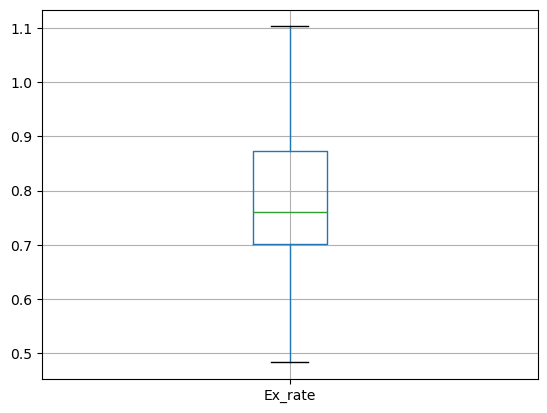

In [338]:
### Checking outliers
df.boxplot()

In [339]:
### There are no outliers

### Part 2: Model Building - ARIMA

##### 1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
##### 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
##### 3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
##### 4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [340]:
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

In [341]:
df.head()

,Ex_rate,Ex_rate_diff
date,,
1990-01-01,0.7855,NaN
1990-01-02,0.7818,-0.0037
1990-01-03,0.7867,0.0049
1990-01-04,0.7860,-0.0007
1990-01-05,0.7849,-0.0011


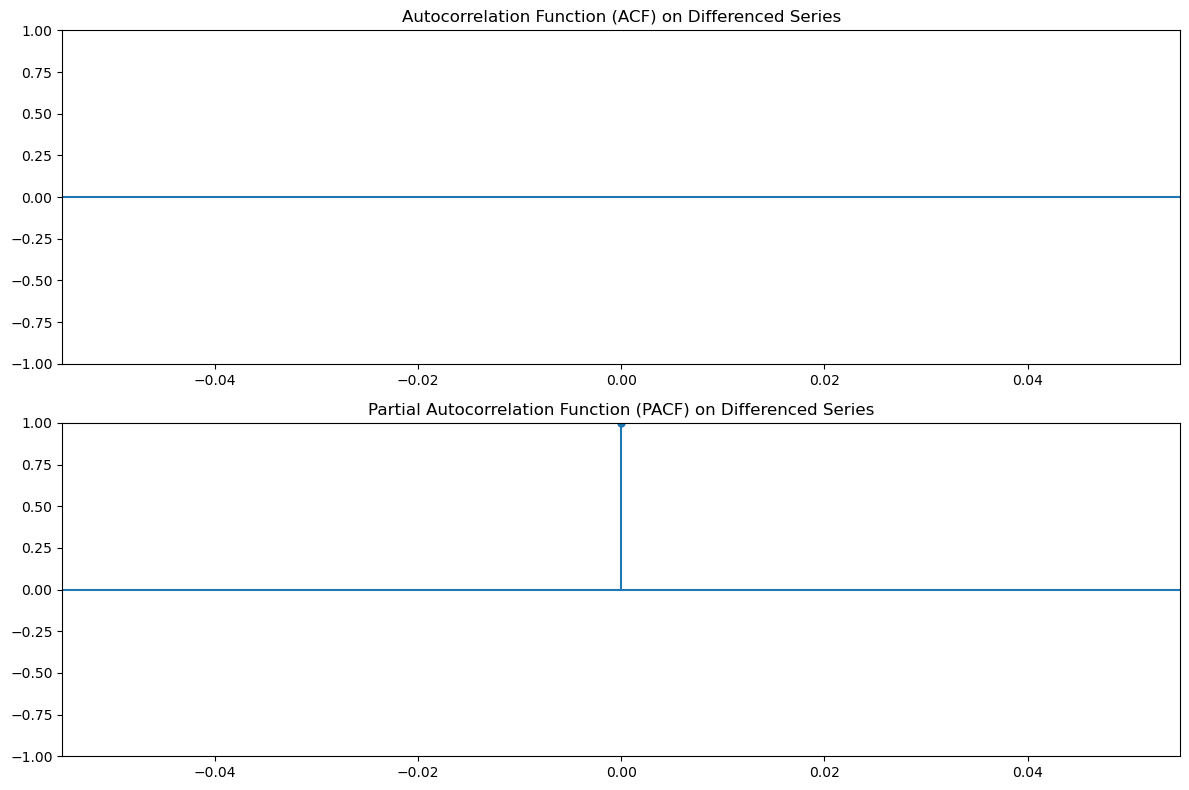

In [342]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Ex_rate_diff'], lags=30, ax=axes[0], title='Autocorrelation Function (ACF) on Differenced Series')
plot_pacf(df['Ex_rate_diff'], lags=30, ax=axes[1], title='Partial Autocorrelation Function (PACF) on Differenced Series', method='ywm')
plt.tight_layout()
plt.show()

In [343]:
p, d, q = 1, 1, 1

In [344]:
train_size = len(df) - 100
train_data = df['Ex_rate'][:train_size]
test_data = df['Ex_rate'][train_size:]

In [345]:
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

In [346]:
print("\nARIMA(1, 1, 1) Model Summary:")
print(model_fit.summary())


ARIMA(1, 1, 1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7488
Model:                 ARIMA(1, 1, 1)   Log Likelihood               27652.883
Date:                Tue, 18 Nov 2025   AIC                         -55299.766
Time:                        12:59:47   BIC                         -55279.003
Sample:                    01-01-1990   HQIC                        -55292.635
                         - 07-02-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1278      0.045     -2.820      0.005      -0.217      -0.039
ma.L1         -0.0047      0.045     -0.103      0.918      -0.094       0.084
sigma2      3.626e-05

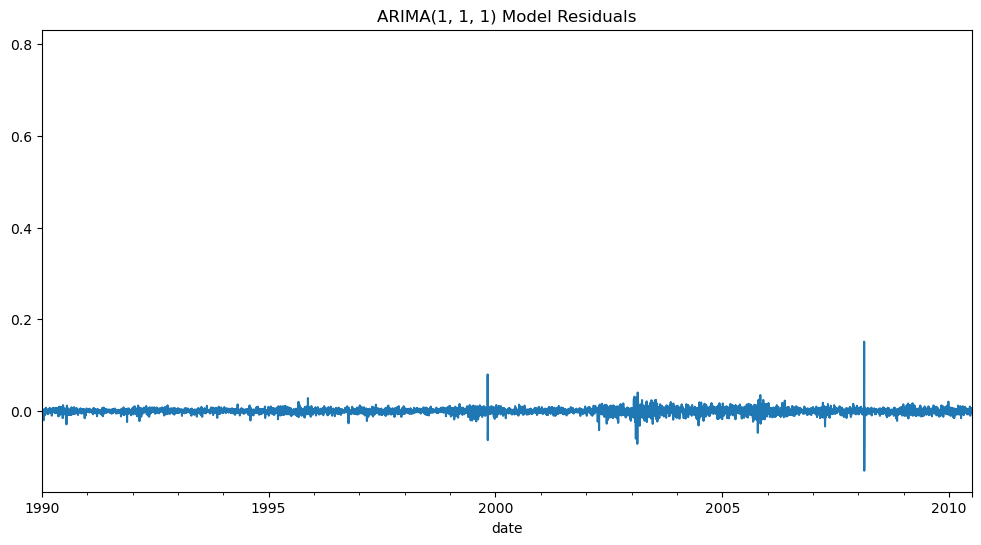

In [347]:
fig, ax = plt.subplots(figsize=(12, 6))
model_fit.resid.plot(ax=ax)
ax.set_title(f'ARIMA({p}, {d}, {q}) Model Residuals')
plt.show()

In [348]:
start = len(train_data)
end = len(df) - 1
forecast_arima = model_fit.predict(start=start, end=end, dynamic=False)

In [357]:
model_fit.predict()

1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782290
1990-01-04    0.786053
1990-01-05    0.786090
                ...   
2010-06-28    0.749193
2010-06-29    0.749190
2010-06-30    0.753613
2010-07-01    0.754213
2010-07-02    0.757503
Freq: D, Name: predicted_mean, Length: 7488, dtype: float64

In [358]:
model_fit.forecast(20)

2010-07-03    0.763204
2010-07-04    0.763306
2010-07-05    0.763293
2010-07-06    0.763294
2010-07-07    0.763294
2010-07-08    0.763294
2010-07-09    0.763294
2010-07-10    0.763294
2010-07-11    0.763294
2010-07-12    0.763294
2010-07-13    0.763294
2010-07-14    0.763294
2010-07-15    0.763294
2010-07-16    0.763294
2010-07-17    0.763294
2010-07-18    0.763294
2010-07-19    0.763294
2010-07-20    0.763294
2010-07-21    0.763294
2010-07-22    0.763294
Freq: D, Name: predicted_mean, dtype: float64

In [359]:
forecast=model_fit.forecast(20)

In [360]:
df['predicted']=model_fit.predict()

In [361]:
df.head()

,Ex_rate,Ex_rate_diff,predicted
date,,,
1990-01-01,0.7855,NaN,0.000000
1990-01-02,0.7818,-0.0037,0.785500
1990-01-03,0.7867,0.0049,0.782290
1990-01-04,0.7860,-0.0007,0.786053
1990-01-05,0.7849,-0.0011,0.786090


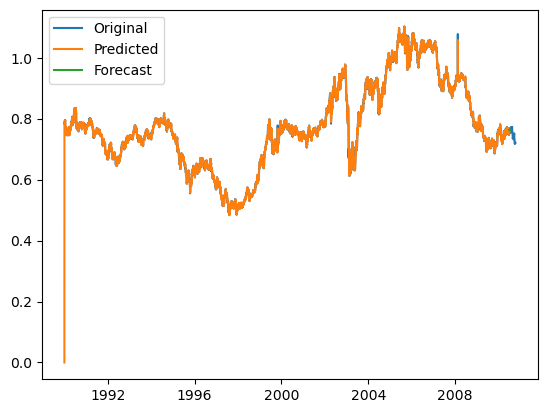

In [362]:
plt.plot(df['Ex_rate'],label='Original')
plt.plot(df['predicted'],label='Predicted')
plt.plot(forecast,label='Forecast')
plt.legend()

### Part 3: Evaluation and Comparison

##### 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
##### 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
##### 3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [363]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))) * 100

In [364]:
forecast_rw = pd.Series([train_data.iloc[-1]] * len(test_data), index=test_data.index)

In [365]:
arima_rmse = np.sqrt(mean_squared_error(test_data, forecast_arima))
arima_mae = mean_absolute_error(test_data, forecast_arima)
arima_mape = mean_absolute_percentage_error(test_data, forecast_arima)

In [366]:
rw_rmse = np.sqrt(mean_squared_error(test_data, forecast_rw))
rw_mae = mean_absolute_error(test_data, forecast_rw)
rw_mape = mean_absolute_percentage_error(test_data, forecast_rw)

In [367]:
results = pd.DataFrame({
    'Model': ['ARIMA(1, 1, 1)', 'Random Walk (Baseline)'],
    'RMSE': [arima_rmse, rw_rmse],
    'MAE': [arima_mae, rw_mae],
    'MAPE (%)': [arima_mape, rw_mape]
})
print(results.to_markdown(index=False, floatfmt=".6f"))

| Model                  |     RMSE |      MAE |   MAPE (%) |
|:-----------------------|---------:|---------:|-----------:|
| ARIMA(1, 1, 1)         | 0.020557 | 0.015015 |   2.041700 |
| Random Walk (Baseline) | 0.021026 | 0.015429 |   2.097865 |


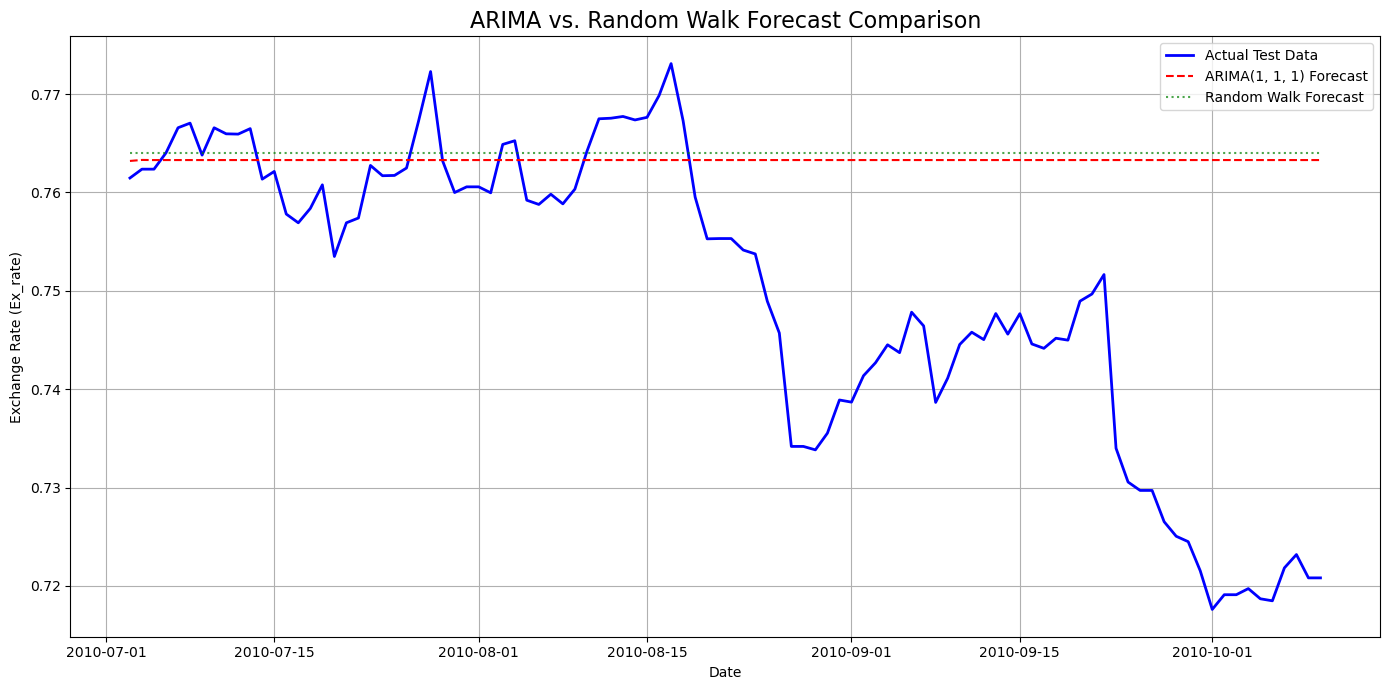

In [368]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue', linewidth=2)
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA(1, 1, 1) Forecast', color='red', linestyle='--')
plt.plot(forecast_rw.index, forecast_rw, label='Random Walk Forecast', color='green', linestyle=':', alpha=0.7)
plt.title('ARIMA vs. Random Walk Forecast Comparison', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Exchange Rate (Ex_rate)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### Advantages of ARIMA
Incorporates autoregressive ($\text{AR}$) and moving average ($\text{MA}$) components to capture subtle serial correlation in the daily changes.
### Limitations of ARIMA
More complex to parameterize

### Advantages of Random Walk
Simplest model possible; highly robust and computationally cheap.
### Limitations of Random Walk
Assumes the next value is exactly the previous value, failing to capture any predictable mean reversion or short-term momentum.